<a href="https://colab.research.google.com/github/Mark-Kinyua/compiler_construction/blob/main/compiler_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ICS 4C_Labactivities**

Student Details: 

1. Mark Muriithi - 112058
2. John Munene - 113522
3. Ishaq Kassam - 120353
4. Kevin Manoti - 121184
5. Bryan Kiplangat - 110204

https://docs.google.com/document/d/1laK_Hpzd9vaICDTyStx0BLjiqcjTL0YV3_V2B8FL30M/edit

**Compiler Construction Lab**

Lab 1

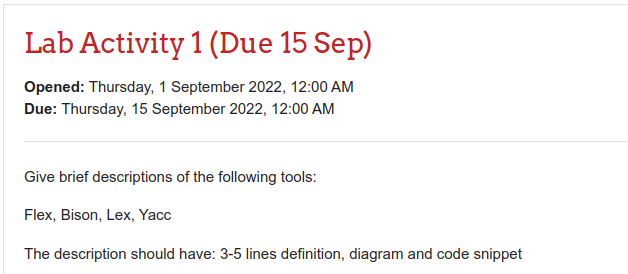

**Flex**



*   
Flex (Fast Lexical Analyser generator) is a tool/computer program for generating lexical analyzers (scanner or lexers). 
*   It is used together with Berkeley Yacc parser generator or GNU Bison parser generator. Flex and Bison are more flexible than Lex and Yacc and produces faster code.

Given image describes how Flex is used:




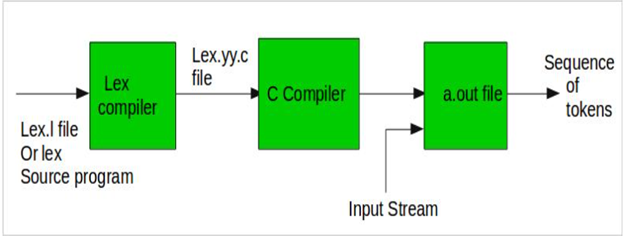

**Steps**
1. An input file describes the lexical analyzer to be generated named lex.l is written in lex language. The lex compiler transforms lex.l to C program, in a file that is always names lex.yy.c

2. The C compiler lex.yy.c file into an executable file called a.out(Unix systems) or a.exe(Windows system)

3. The output file a.out take a stream of input characters and produces a stream of tokens

The below code is meant to count the number of characters in a string.
It is written in C.
Definition Section has one variable
which can be accessed inside yylex() 
and main()

In [ ]:

%{
int count = 0;
%}

%%
[A-Z] {printf("%s capital letter\n", yytext);
       count++;}

. 	{printf("%s not a capital letter\n", yytext);}
\n	
{return 0;}
%%
  


int yywrap(){}
int main(){
  

FILE *fp;
char filename[50];
printf("Enter the filename: \n");
scanf("%s",filename);
fp = fopen(filename,"r");
yyin = fp;
  
yylex();

printf("\nNumber of Capital letters " "

in the given input - %d\n", count);
  
return 0;
}



**Explanantion**



*   yywrap() - wraps the above rule section
*   yyin - takes the file pointer which contains the input
*   yylex() - this is the main flex function           which runs the Rule Section yytext is the text in the buffer






*   Rule Section has three rules, first rule  matches with capital letters, second rule matches with any character except newline and third rule does not take input after the enter.
*  Code Section prints the number of capital letter present in the given input



# OUTPUT

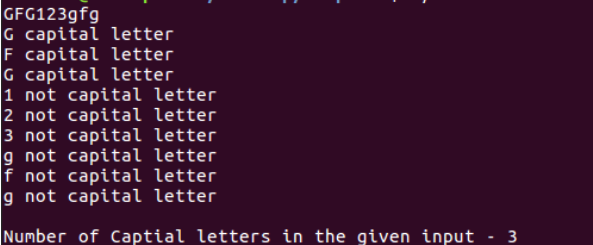


**BISON**


*   Bison is a parser generator, it is to parsers what flex is to scanners (Pyster, 1988). 
*   Bison is designed for use with C code and generates a parser written in C (Pyster, 1988).


**How it works**


*   You provide a grammar specification file, which is traditionally named using a .y extension. 
*   You invoke bison on the .y file and  it creates the y.tab.h file and y.tab.c files containing a thousand or so lines of intense C code that implements an efficient LALR(1) parser for your grammar, including the code for actions you specified (Pyster, 1988).



*   The file provides an extern function yyparse.y that will attempt to successfully parse a valid sentence. 
*   You compile that C file normally, link with the rest of your code and you have a parser. By default the parser reads from stdin and writes to stdout, just like a flex generated scanner does (Levine,1992).



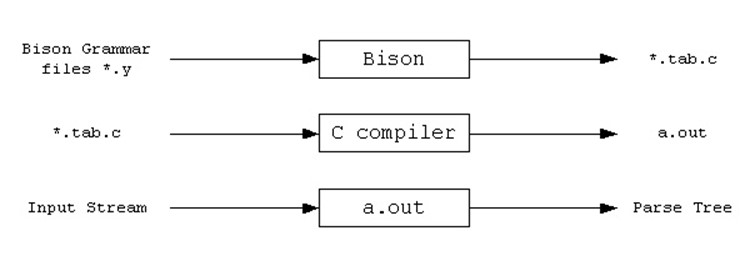

**Bison File Format**

Your input file in Bison is organized as follows:

In [ ]:
%{ 

Declarations

 %} 

Definitions 

%% 

Productions

 %%
User subroutines






*   
The optional declarations and User subroutines sections are used for ordinary C code that you want copied verbatim to the generated C file, declarations are copied to the top of the file, user subroutines to the bottom.
*   The optional  Definitions section is where you configure various parser features such as defining token codes, establishing operator precedence and associativity, and setting up the global variables used to communicate between the scanner and the parser.
*   The required productions section is where you specify the grammar rules



**Example**

Below is a bison input file for a simple calculator that recognizes and evaluates binary postfix expressions using a stack


In [ ]:

%{ 
  #include <stdio.h>
  #include <assert.h>

static int Pop(); 

static int Top();

static void Push(int val); 

%}

%token T_Int 

%% 
%% 

S : S E '\n' { printf("= %d\n", Top()); }

   |

   ;

E : E E '+' { Push(Pop() + Pop()); }

| E E '-' { int op2 = Pop(); Push(Pop() - op2); }

| E E '*' { Push(Pop() * Pop()); }

| E E '/' { int op2 = Pop(); Push(Pop() / op2); }

| T_Int { Push(yylval); }

    ;

%%

static int stack[100], count = 0; 

static int Pop() { 

assert(count > 0); 

return stack[--count]; 

} 

static int Top() { 

   assert(count > 0); 
   return stack[count-1]; 

} 

static void Push(int val) { 

assert(count < sizeof(stack)/sizeof(*stack)); 


stack[count++] = val; 

} 

int main() {

return yyparse(); 

}



**Lex**

Lex, an acronym that stands for ‘Lexical Analyzer Generator’, is a program designed to generate scanners, also known as tokenizers, which recognize lexical patterns in text (TechTarget, 2007). A lex program is separated into three sections by %% delimiters as shown below: (Javapoint, 2022)


In [ ]:

{ definitions }   //include declarations of constant, variable and regular definitions
%%  
 { rules }   //define the statement of form p1{action1} p2{action2}...pn{action}
%%   
{ user subroutines }  //are auxiliary procedures needed by the action

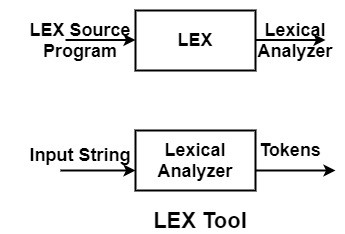

**Yacc**

A tool that generates a parser / syntax analyser from a grammar and describes this input to a computer program. (YACC - Javatpoint)

YACC takes an input of a context free grammar, written in a .y file, compiles it and produces the source code of the syntactic analyser of the language from the given grammar.
(Johnson)


Below is a simple yacc sentence parser

In [ ]:
%{
 /*
 * A lexer for the basic grammar to use for recognizing English sentences. 
*/


 #include <stdio.h>
%}

%token NOUN PRONOUN VERB ADVERB ADJECTIVE PREPOSITION CONJUNCTION

%%
sentence: subject VERB object{ printf("Sentence is valid.\n"); }
;

subject:  	NOUN

     | 	PRONOUN ;

object: 		NOUN;

%%

extern FILE *yyin;
main()
{

do

{

   yyparse();

     }

while (!feof(yyin));

}

yyerror(s) 

char *s;

{

 fprintf(stderr, "%s\n", s); 

}

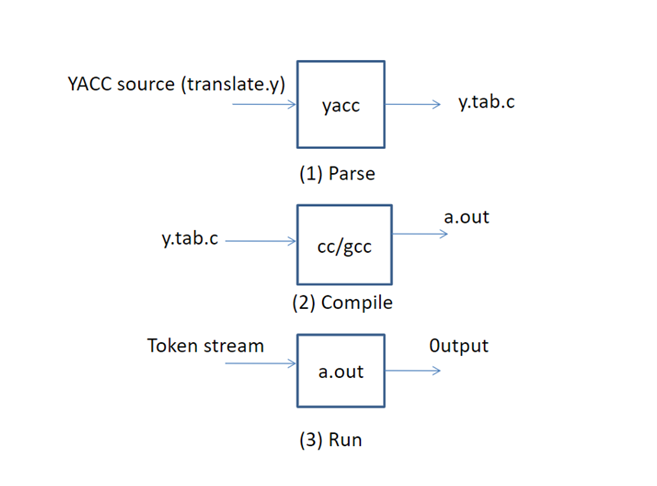

***References***

  TechTarget. 2007. Lex (lexical analyzer generator). Retrieved from https://www.techtarget.com/whatis/definition/Lex-lexical-analyzer-generator

  Javapoint. 2022. LEX. Retrieved from https://www.javatpoint.com/lex

  Bison Tutorial. (n.d.). Retrieved September 5, 2022, from http://alumni.cs.ucr.edu/%7Elgao/teaching/bison.html#parser

  Pyster, A., Compiler Design and Construction. New York, NY: Van Nostrand Reinhold, 1988.

  Levine, J., Mason, T. & Brown, D., Lex and Yacc. Sebastopol, CA: O’Reilly & Associates, 1992.
  
  Johnson, S. (n.d.). Yacc: Yet Another Compiler-Compiler. Retrieved 6 September 2022, from http://dinosaur.compilertools.net/yacc/index.html
  
  YACC - javatpoint. (n.d.). Retrieved 6 September 2022, from https://www.javatpoint.com/yacc


==================================================================================================================================

**LAB 2**

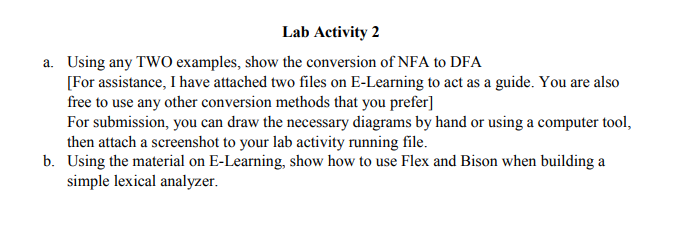

***(A) NFA -> DFA***

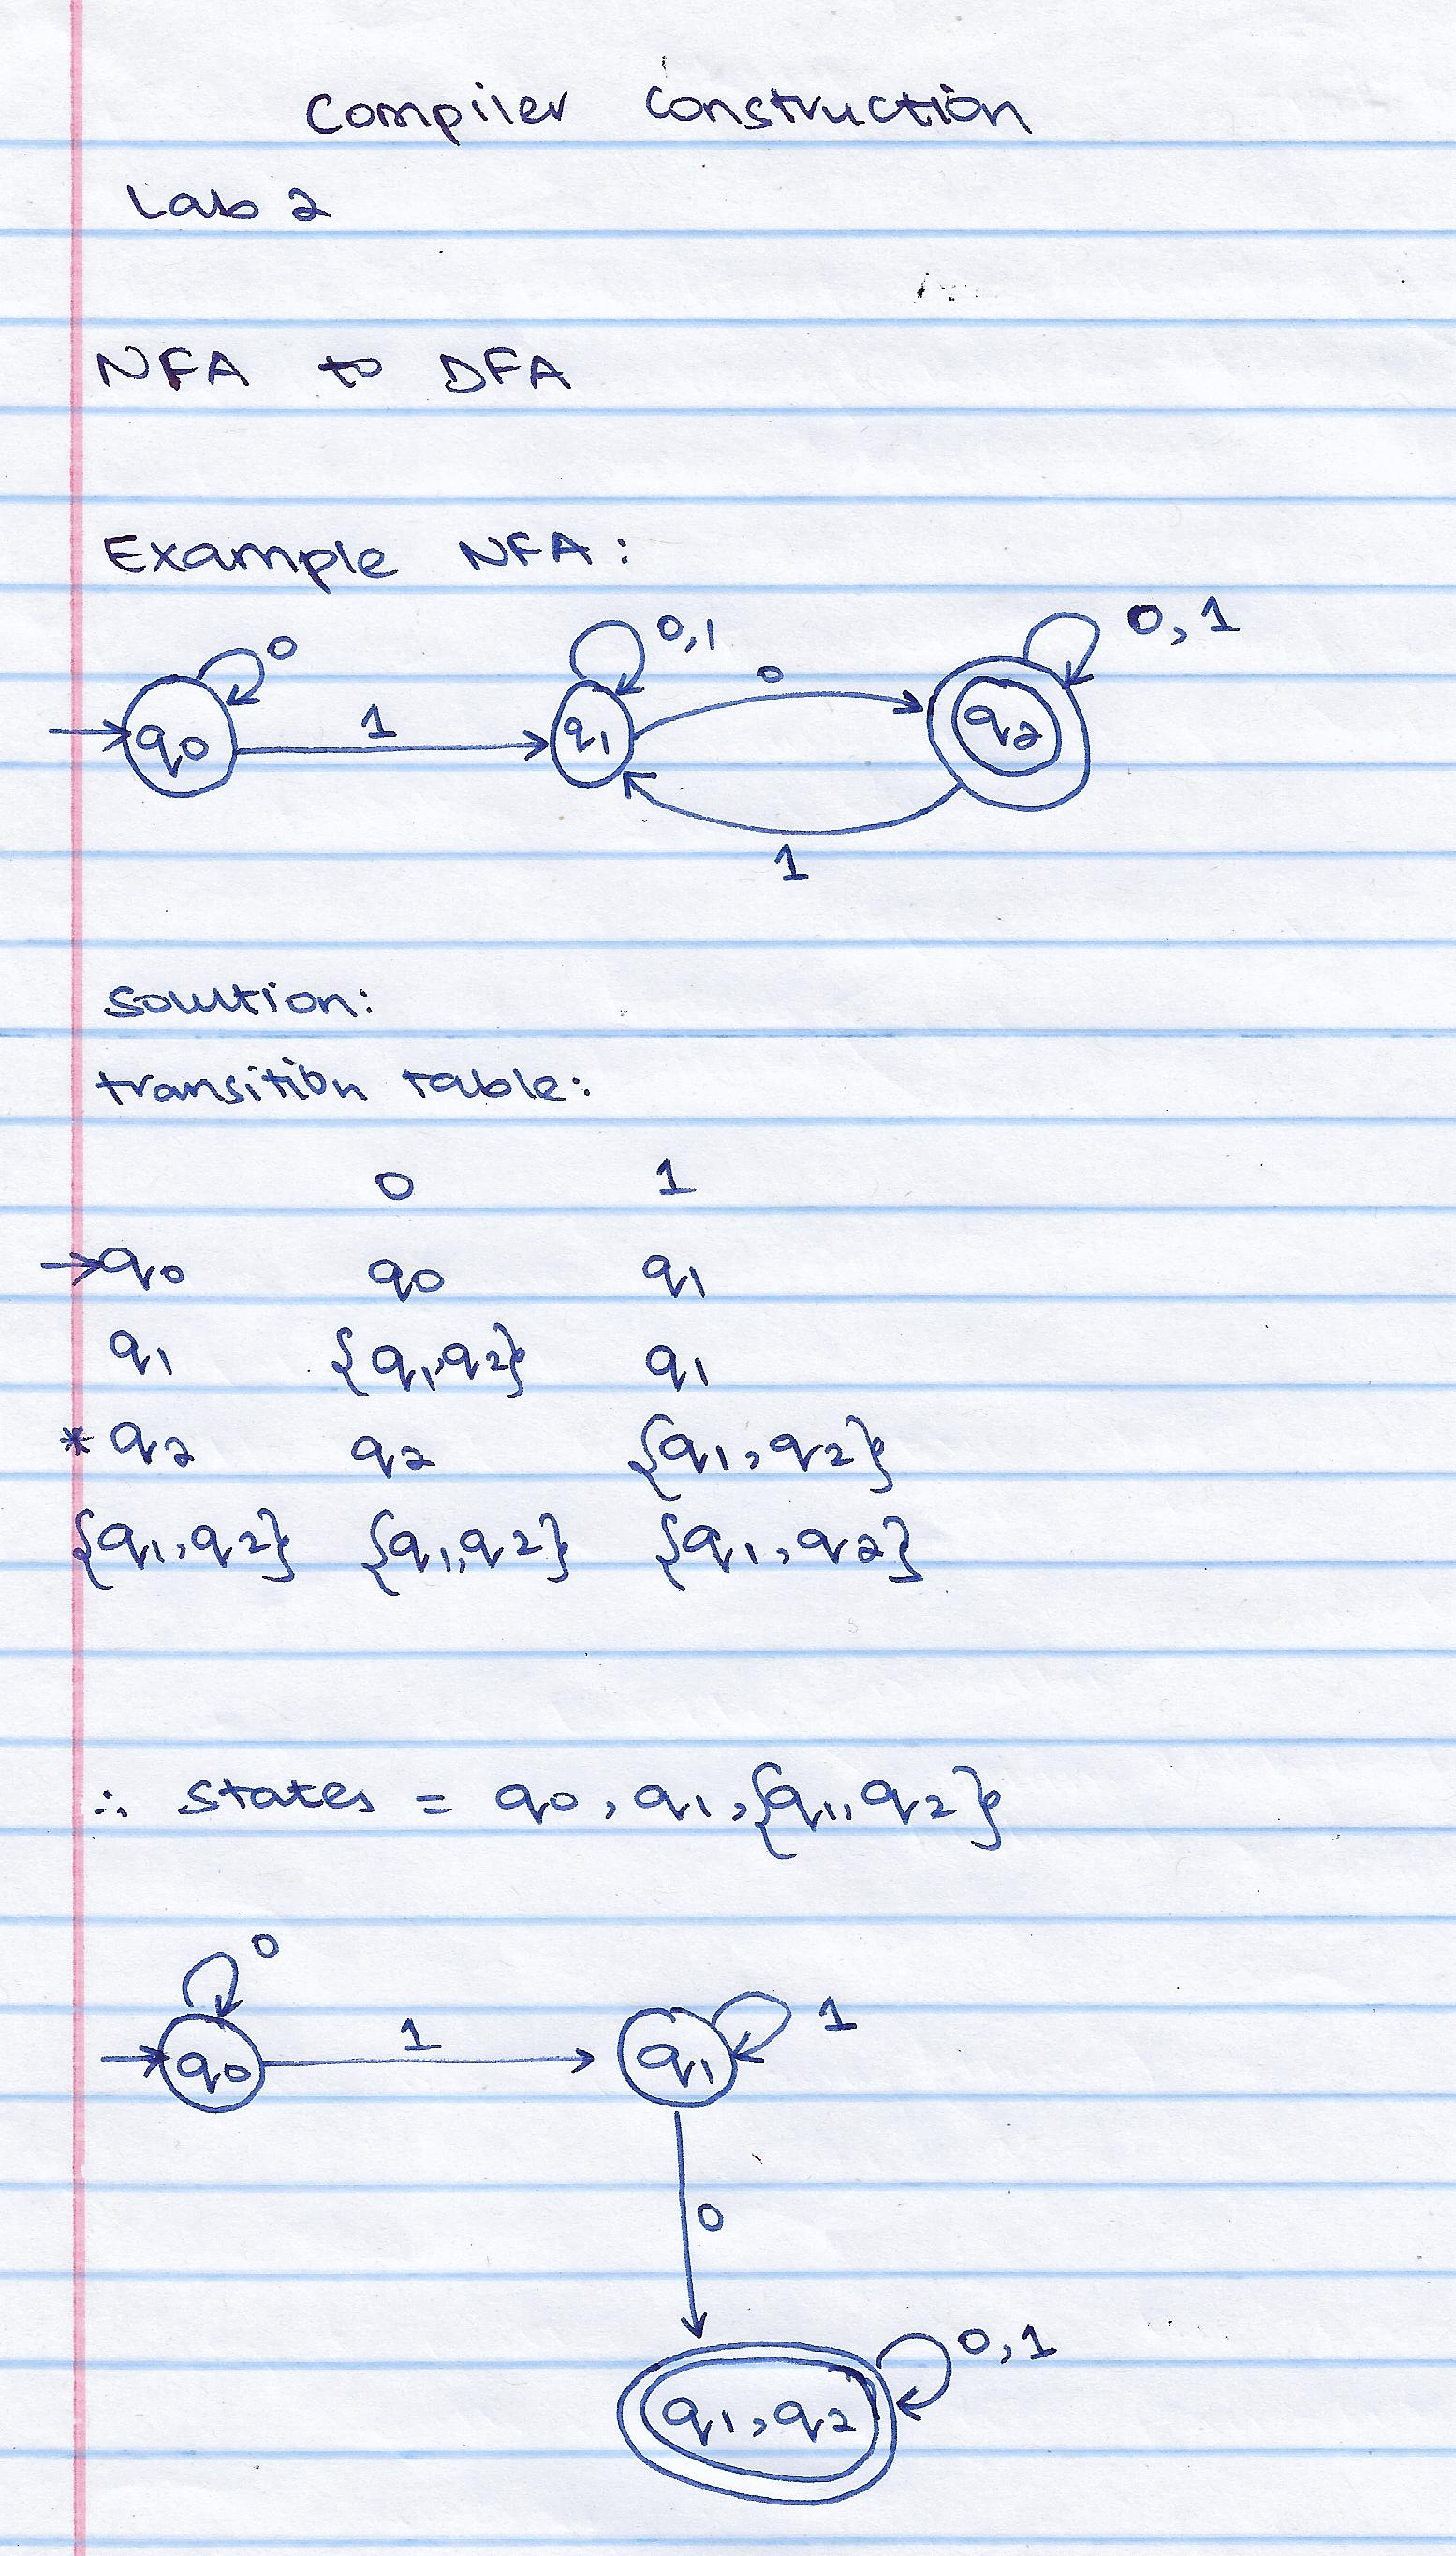

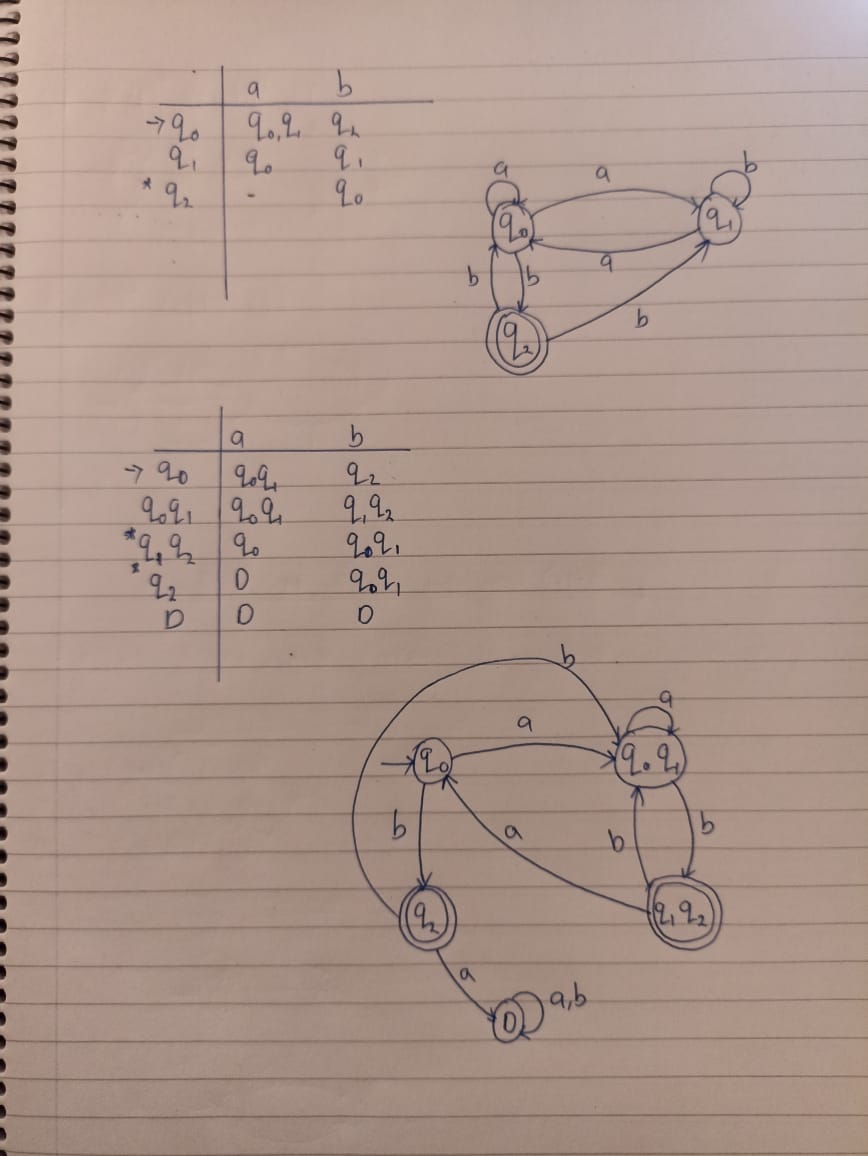

https://www.geeksforgeeks.org/conversion-from-nfa-to-dfa/

https://www.gatevidyalay.com/converting-nfa-to-dfa-solved-examples/

https://www.cs.odu.edu/~toida/nerzic/390teched/regular/fa/nfa-2-dfa.html

**(B) How to Use Flex & Bison in Simple Lexical Analyzer**

**How to use Flex to generate a Scanner/Lexer** 

Step 1: An input file describes the lexical analyzer to be generated named lex.l is written in lex language. The lex compiler transforms lex.l to C program, in a file that is always named lex.yy.c. 

Step 2: The C compiler compile lex.yy.c file into an executable file called a.out. 

Step 3: The output file a.out take a stream of input characters and produce a stream of tokens. 



*   The code examples have been provided in the Lab 1





**How to Use Bison to Build a Parser with an Example**

For example, the bison grammar file called file.y. By default, bison will create the output file with the same name as the input file, with .tab appended to the name. The Bison examples shown in Lab 1 go into the depths of Bison grammar file formats and what happens after you invoke Bison on a file.

```Bison file.y```

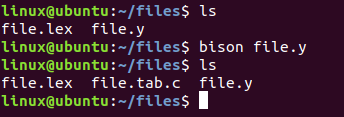



===============================================================================
=====================================================================

**LAB 3**



Below is a flex file that counts Uppercase letters, lowercase letters, numbers, words and lines from a file. The file also identifies special characters in the file.




```
/*** Definition Section has one variable
which can be accessed inside yylex()
and main() ***/

%{
 int lines = 1,
  words = 0,
  lowercase_letters = 0,
  uppercase_letters = 0,
  numbers = 0,
  special_characters = 0,
  totals = 0,
  size = 0; 
%}

 
/*** Rule Section has six rules***/


%%
\n { lines++; words++;}
 [\t ' '] words++; /* words are separated by a space */
 [A-Z] uppercase_letters++;
 [a-z] lowercase_letters++;
 [0-9] numbers++;
.     {printf("%s is a special character\n", yytext);}
%%

 
/*** 
Code Section prints the number of
uppercase letters, lowercase_letters, numbers, words and lines  present in the given input. the code also identifies special characters in a file
***/


int yywrap(){}
int main(){
/*yyin - takes the file pointer
          which contains the input*/
/* yylex() - this is the main flex function
          which runs the Rule Section*/
// yytext is the text in the buffer
 

// below code take input from file
 FILE *fp;
 char filename[50];
 printf("Enter the filename: \n");
 scanf("%s",filename);
 fp = fopen(filename,"r");
 yyin = fp;
 
yylex();
  printf("This file contains the following:");
  printf("\n\t%d lines", lines);
  printf("\n\t%d words", words);
  printf("\n\t%d Lowercase letters", lowercase_letters);
  printf("\n\t%d Uppercase letters", uppercase_letters);
  printf("\n\t%d digits", numbers);
return 0;
}```


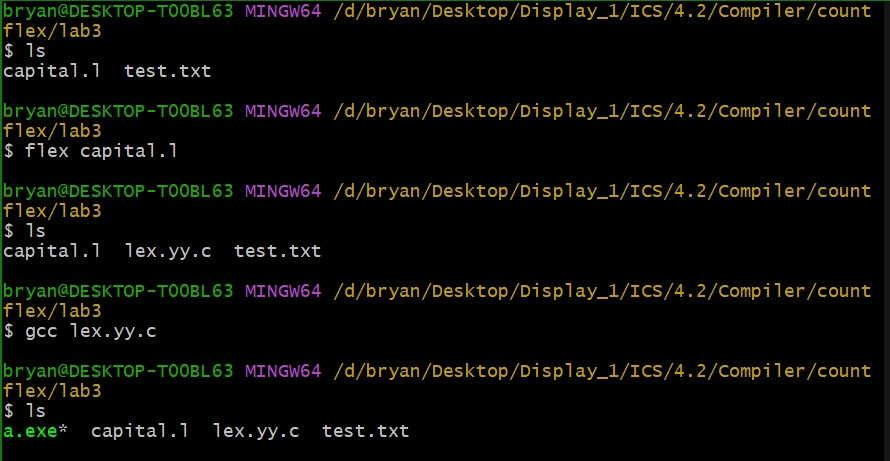

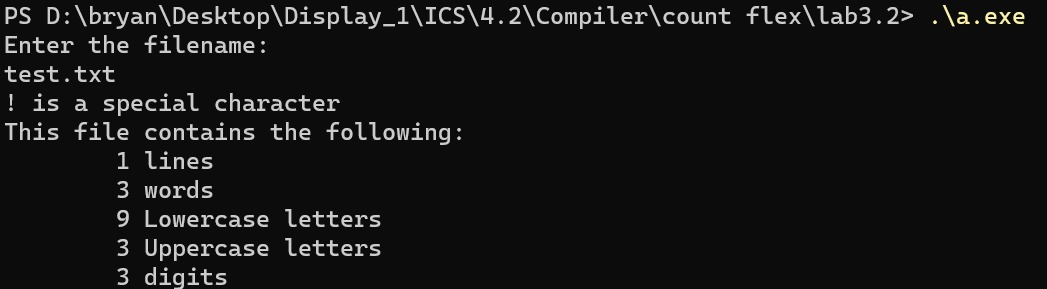

==========================================================================================================================

**LAB 4**

**1. Using an example or illustration, explain what is predictive parsing?**


**Predictive Parsing:**

Predictive parsing is a special form recursive descent parsing where  **no backtracking or backup** is required so this can predict which products to use to replace input strings. 

Following are the steps to perform predicitve parsing:

1) Elimination of Left Recursion

2) Left Factoring

3) Computation of FIRST & FOLLOW

4) Construction of Predictive Parsing Table

5) Parse the Input String

*With this is mind, below is an example of how an algorithm implementing predicitive parsing would work and images depicting creation of each step.*

A predicitive parser algorithm has **4 steps**:

1) Make a transition diagram(DFA/NFA) for every rule of grammar.

2) Optimize the DFA by reducing the number of states, yielding the final transition diagram.

3) Simulate the string on the transition diagram to parse a string.

4) If the transition diagram reaches an accept state after the input is consumed, it is parsed.

Lets consider the following grammar:

E->E+T|T

T->T*F|F

F->(E)|id

After removing left Recursion and left Factoring, the grammar will look like this:

E->TT'

T'->+TT'|ε

T->FT''

T''->*FT''|ε

F->(E)|id

Step 1: Make a transition diagram(DFA/NFA) for every rule of grammar.

E->TT’

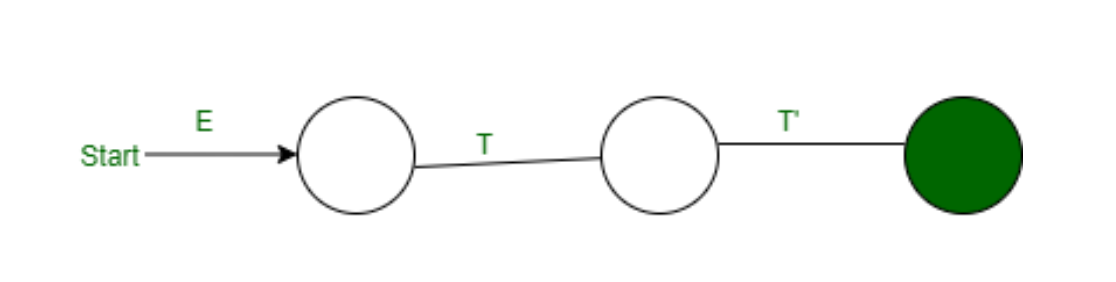

T’->+TT’|ε

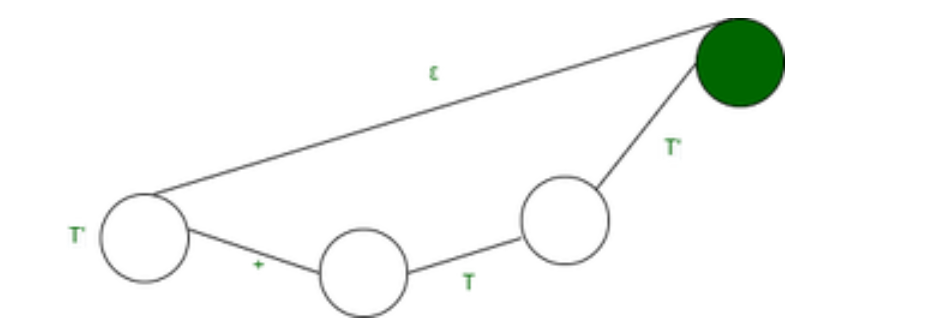

T->FT”

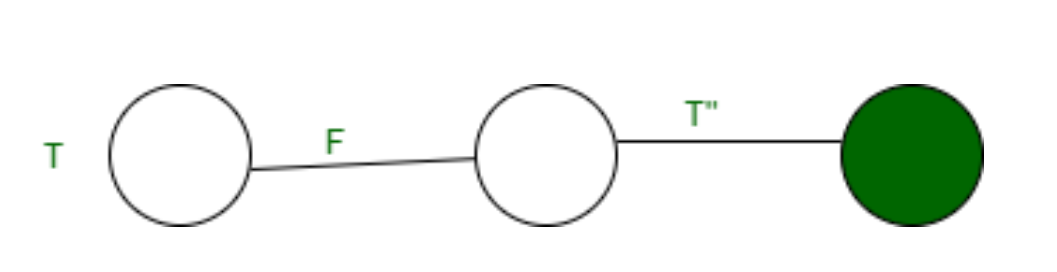

T”->*FT”|ε

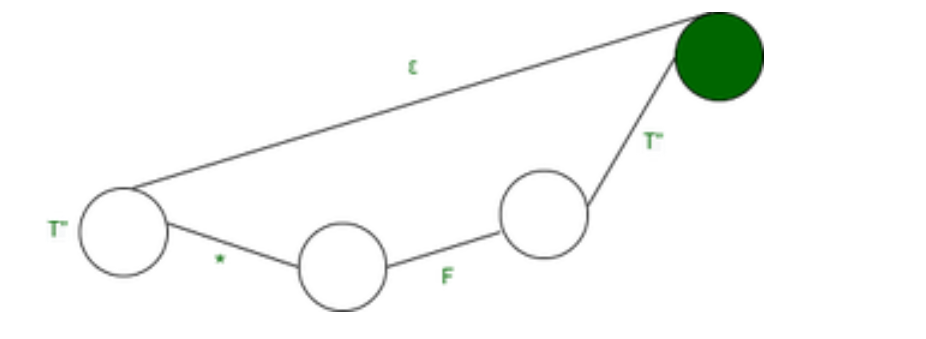

F->(E)|id

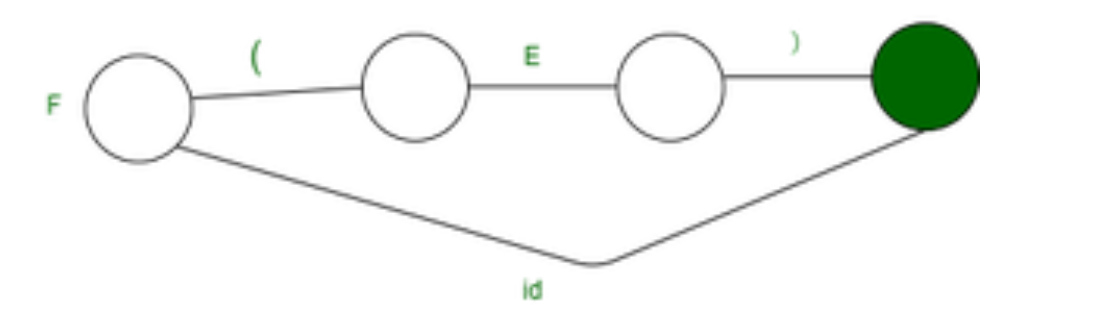

Step 2: Optimize the DFA by decreases the number of states, yielding the final transition diagram.

T’->+TT’|ε
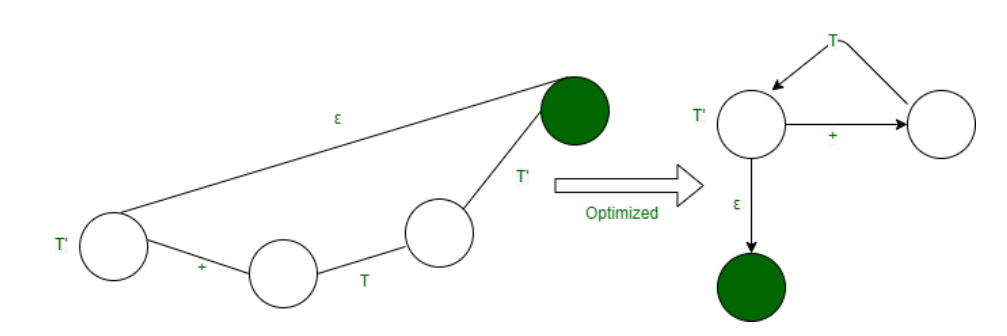

It can be optimized ahead by combining it with DFA for E->TT’


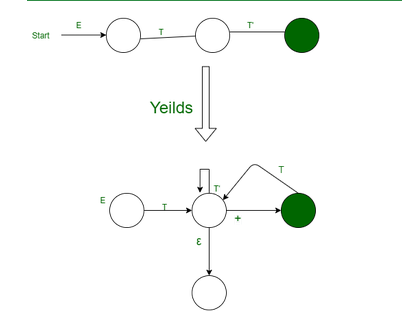

Accordingly, we optimize the other structures to produce the following DFA

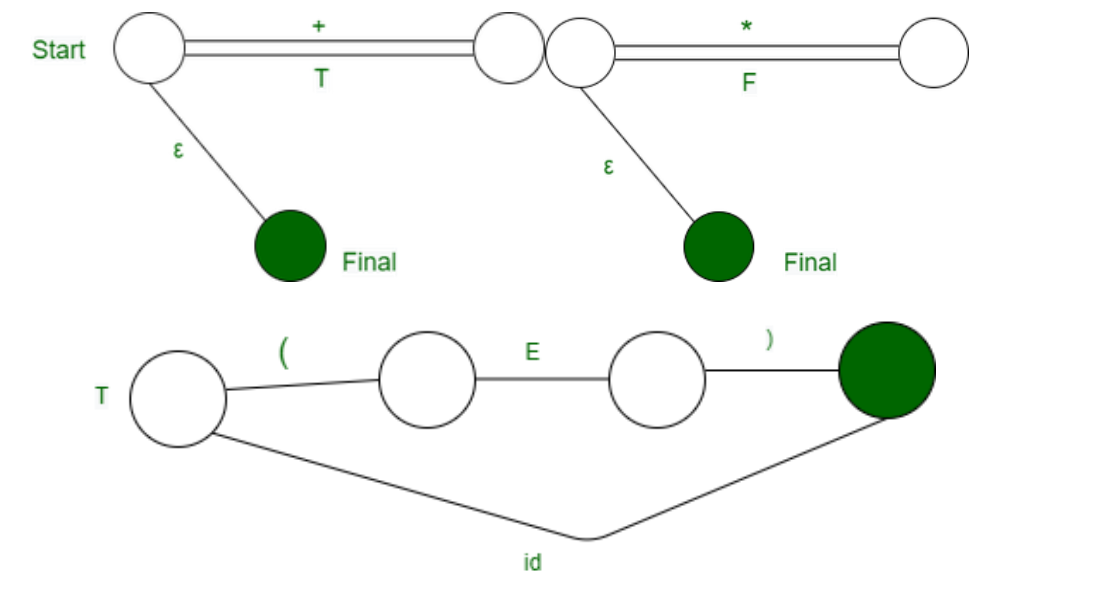

Step 3: 
Simulation on the input string.
Steps involved in the simulation procedure are:

1) Start from the starting state

2) If a terminal arrives consume it, move to the next state.

3) If a non-terminal arrive go to the state of the DFA of the non-terminal and return on reached up to the final state.

4) Return to actual DFA and Keep doing parsing.

5) If one completes reading the input string completely, you reach a final state, and the string is successfully parsed.

 **2. a) What is LL (1) parsing?**

LL(1) parsing is a top-down parsing method in the syntax analysis phase of compiler design.  Required components for LL(1) parsing are input string, a stack, parsing table for given grammar, and parser. (GeeksForGeeks, 2022)

The first L indicates that the input is read from left to right. The second L says that it produces a left-to-right derivation and the 1 says it uses one lookahead token. (cs, 2022)



**2. b) Why do we get the First () and Follow () i.e. what do these two functions Really Represent?**



*   First and Follow functions are needed so that the parser can properly apply the needed production rule at the correct position (What Are FIRST and FOLLOW and How They Are Computed?, n.d.). 
*   First() - it is a function that gives the set of terminals that begin the strings derived from the production rule I.e. A symbol c is in the First (α) if and only if α => cβ  (What Are FIRST and FOLLOW and How They Are Computed?, n.d.)


*   Follow(X) - It is said to be the set of terminals that can appear immediately to the right of Non-Terminal X in some sentential form (GeeksforGeeks, 2022). 

  **Example**

  S ->Aa | Ac
 
 A ->b 

Follow (S) = {$} where S is the starting symbol

 Follow(A) = {a,c}
 








**3. Are there any unique attributes associated with Top-Down parsing?**

1. Top-Down Parsing constructs from the Grammar which is free from ambiguity and left recursion.

2. Top-Down Parsing uses leftmost derivation to construct a parse tree.

3. Top down parsing does not allow Grammar with Common Prefixes.

4. Top down parsing constructs the parse tree top down rather than bottom up


**References**

GeeksforGeeks. (2021). Predictive Parser in Compiler Design. Retrieved from https://www.geeksforgeeks.org/predictive-parser-in-compiler-design/

GeeksforGeeks. (2022). FOLLOW Set in Syntax Analysis. Retrieved from https://www.geeksforgeeks.org/follow-set-in-syntax-analysis/


cs. (2022). LL(1) Parsers. Retrieved from http://www.cs.ecu.edu/karl/5220/spr16/Notes/Top-down/LL1.html

Tutorialspoint. (2022). What are FIRST and FOLLOW and how they are computed? Retrieved from https://www.tutorialspoint.com/what-are-first-and-follow-and-how-they-are-computed




==============================================================================================================================================================================================================================================

**Lab Activity For Week Starting 17th October**

**1. Review what syntax analysis is and in a few words, describe what this phase of compiler
construction entails.**

Syntax Analysis is the second phase in compiler construction after Lexical Analysis. It checks the syntactical structure of the given input whether the given input is in the correct syntax or not. This is achived by building of a Parse tree which is constructed by using the pre-defined Grammar of the language of the input string. If the input string can be produced with the help of the syntax tree, the input string is found to be in the correct syntax. If not, the error is reported by the syntax analyser.  

**2. Using Flex (lexical analyzer) and Bison (yacc), show how one can develop a simple
syntax analyzer. [Consult the web, show and explain the simple codes that you find].**

We are going to write a desk calculator using flex and bison. First we will write a scanner, and then we will write a parser and splice the two of them together.

To keep things simple, we'll start by recognizing only integers, four basic arithmetic operators and a unary absolute value operator.

**Example**

*desk_calculator.l*

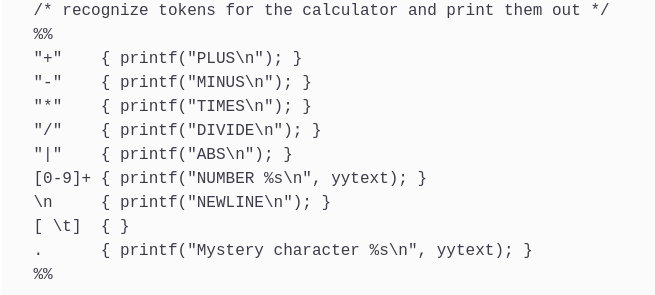





*   The first 5 patterns are literal operators, written as quoted strings, and the actions, for now, just print a message saying what matched. The quotes tell flex to use the strings as is, rather than interpreting them as regular expressions.

 
*   The sixth pattern matches an integer. The bracketed pattern [0-9]matches any single digit, and the following + sign means to match one or more of the preceding item, which here means a string of one or more digits. The action prints out the string that is matched, using the pointer yytext that the scanner sets after each match.



*   The seventh pattern matches a newline character, represented by the usual C \n sequence.


*   The eighth pattern ignores whitespace. It matches any single space or tab (\t), and the empty action code does nothing.



*   The final pattern is the catchall to match anything the other patterns did not. Its action code prints a suitable complaint.


These nine patterns now provide rules to match anything that the user might enter. As we continue to develop the calculator, we will add more rules to match more tokens, but these will do to get us started.


In this simple flex program, there is no C code in the third section. The flex library (-lfl) provides a tiny main program that just calls the scanner, which is adequate for this example.

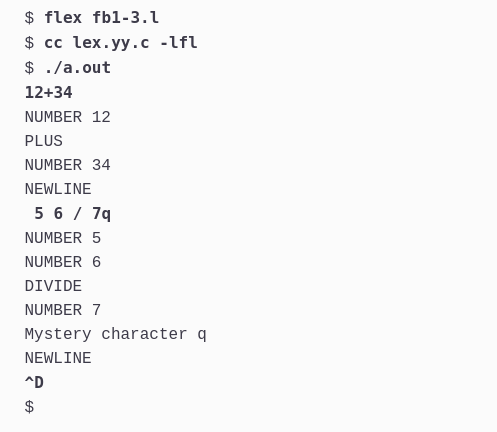








**Tokens and Values**

When a flex scanner returns a stream of tokens, each token actually has two parts, the token and the token’s value. The token is a small integer. The token numbers are arbitrary, except that token zero always means end-of-file. When bison creates a parser, bison assigns the token numbers automatically starting at 258 (this avoids collisions with literal character tokens, discussed later) and creates a .h with definitions of the tokens numbers. But for now, we’ll just define a few tokens by hand:

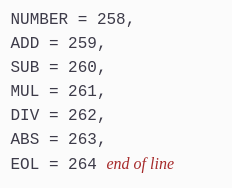


A token’s value identifies which of a group of similar tokens this one is. In our scanner, all numbers are NUMBER tokens, with the value saying what number it is. When parsing more complex input with names, floating-point numbers, string literals, and the like, the value says which name, number, literal, or whatever, this token is. Our first version of the calculator’s scanner, with a small main program for debugging, is in the example below.

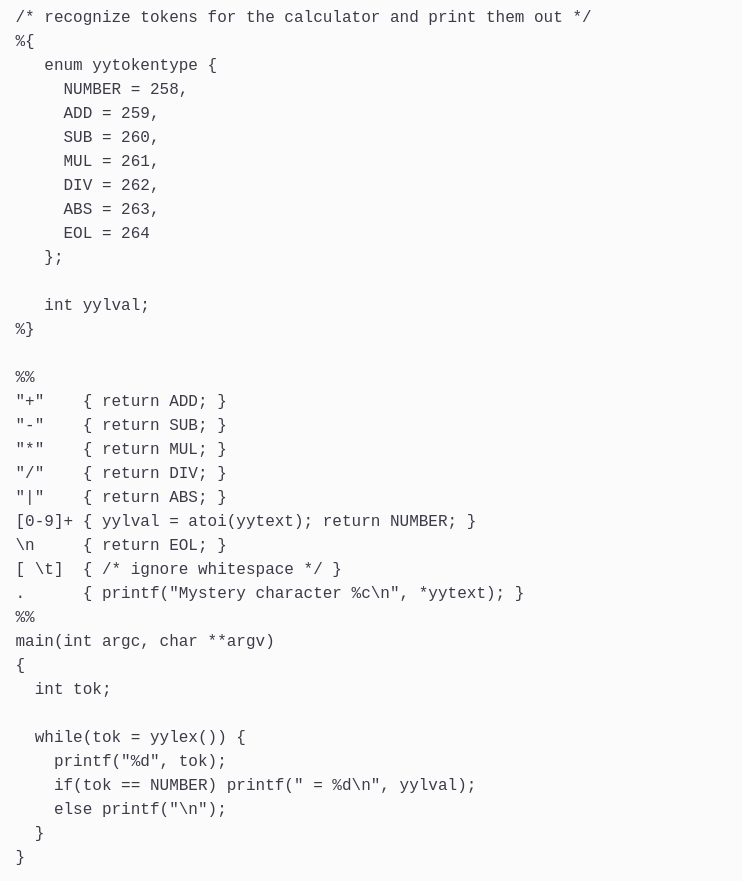

We define the token numbers in a C enum. Then we make yylval, the variable that stores the token value, an integer, which is adequate for the first version of our calculator. (Later we’ll see that the value is usually defined as a union so that different kinds of tokens can have different kinds of values, e.g., a floating-point number or a pointer to a symbol’s entry in a symbol table.)

The list of patterns is the same as in the previous example, but the action code is different. For each of the tokens, the scanner returns the appropriate code for the token; for numbers, it turns the string of digits into an integer and stores it in yylval before returning. The pattern that matches whitespace doesn’t return, so the scanner just continues to look for what comes next.

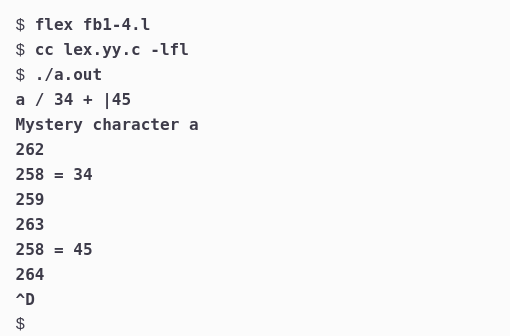

**Bison and Parsing**

In [ ]:
/* simplest version of calculator */
%{
#include <stdio.h>
%}

/* declare tokens */
%token NUMBER
%token ADD SUB MUL DIV ABS
%token EOL

%%

calclist: /* nothing */                       matches at beginning of input
 | calclist exp EOL { printf("= %d\n", $2); } EOL is end of an expression
 ;

exp: factor       default $$ = $1 
 | exp ADD factor { $$ = $1 + $3; }
 | exp SUB factor { $$ = $1 - $3; }
 ;

factor: term       default $$ = $1 
 | factor MUL term { $$ = $1 * $3; }
 | factor DIV term { $$ = $1 / $3; }
 ;

term: NUMBER  default $$ = $1 
 | ABS term   { $$ = $2 >= 0? $2 : - $2; }
;
%%
main(int argc, char **argv)
{
  yyparse();
}

yyerror(char *s)
{
  fprintf(stderr, "error: %s\n", s);
}

The declarations here include C code to be copied to the beginning of the generated C parser, again enclosed in %{ and %}. Following that are %token token declarations, telling bison the names of the symbols in the parser that are tokens. 

The second section contains the rules in simplified BNF. Bison uses a single colon rather than ::=, and since line boundaries are not significant, a semicolon marks the end of a rule. Again, like flex, the C action code goes in braces at the end of each rule.

Bison automatically does the parsing for you, remembering what rules have been matched, so the action code maintains the values associated with each symbol. Bison parsers also perform side effects such as creating data structures for later use or, as in this case, printing out results. The symbol on the left side of the first rule is the start symbol, the one that the entire input has to match. There can be, and usually are, other rules with the same start symbol on the left.

Each symbol in a bison rule has a value; the value of the target symbol (the one to the left of the colon) is called $$ in the action code, and the values on the right are numbered $1, $2, and so forth, up to the number of symbols in the rule. The values of tokens are whatever was in yylval when the scanner returned the token; the values of other symbols are set in rules in the parser. In this parser, the values of the factor, term, and exp symbols are the value of the expression they represent.

In this parser, the first two rules, which define the symbol calclist, implement a loop that reads an expression terminated by a newline and prints its value. The definition of calclist uses a common two-rule recursive idiom to implement a sequence or list: the first rule is empty and matches nothing; the second adds an item to the list. The action in the second rule prints the value of the exp in $2.

The rest of the rules implement the calculator. The rules with operators such as exp ADD factor and ABS term do the appropriate arithmetic on the symbol values. The rules with a single symbol on the right side are syntactic glue to put the grammar together; for example, an exp is a factor. In the absence of an explicit action on a rule, the parser assigns $1 to $$. This is a hack, albeit a very useful one, since most of the time it does the right thing.

**Compiling Flex and Bison Programs Together**

Before we build the scanner and parser into a working program, we have to make some small changes to the scanner in second example, so we can call it from the parser.

In particular, rather than defining explicit token values in the first part, we include a header file that bison will create for us, which includes both definitions of the token numbers and a definition of **yylval**. We also delete the testing main routine in the third section of the scanner, since the parser will now call the scanner. The first part of the scanner now looks like this:


In [ ]:
%{
# include "fb1-5.tab.h"
%}
%%  same rules as before, and no code in the third section

The build process is now complex enough to be worth putting into a ***Makefile***:

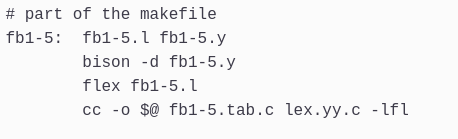

First it runs bison with the -d (for “definitions” file) flag, which creates fb1-5.tab.c and fb1-5.tab.h, and it runs flex to create lex.yy.c. Then it compiles them together, along with the flex library. 



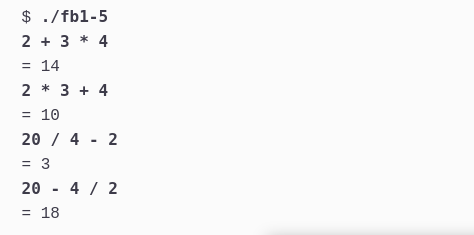

**Lab Activity for the week starting on 24th**

**Lexical analyzer**

The main task of lexical analysis is to read input characters in the code and then produce tokens. It scans the entire source code of the program, then identifies each token one by one. Scanners are usually implemented to produce tokens only when requested by a parser.  

X=a + b *y 

X = id

= op 

+= op

a=id 

Y =id 




 

**Syntax Analyzer** 

A syntax analyzer or parser takes the input from a lexical analyzer in the form of token streams. The parser analyzes the source code (token stream) against the production rules to detect any errors in the code. The output of this phase is a parse tree.  

id = id + id * id

Using production rule

E-> E + E

E-> E * E

E-> id

left most derivation output is 
E-> E + E

E-> E + E * E

E-> id + E * E

E-> id + id * E

E-> id + id * id


 

 



 

 

 

 

 



 

 

**Intermediate code generator**

It generates intermediate code, which is a form that can be readily executed by a machine. We have many popular intermediate codes.  Intermediate code is converted to machine language using the last two phases which are platform dependent.  

X=a + b * y 

t1 = c * d;

t2 = b + t1; 

t2 = a 

 

**Code optimizier** 

It uses a technique that transforms the code so that it consumes fewer resources and delivers more speed. During optimization, high-level general programming constructs are replaced by very efficient low-level programming codes. Optimization can be categorized into two types: machine-dependent and machine-independent. 

Certain rules must be followed: 

The output code must not change the meaning of the program. 

Optimization should increase the speed of the program and if possible, the program should demand a smaller number of resources. 

Optimization itself should be fast and should not delay the overall compiling process. 

****Lab activity for week starting 31st oct 2022****

1 . Write the three address code (TAC) of the following:
https://www.geeksforgeeks.org/types-of-three-address-codes/

a. Any if-statement of your choice

In [ ]:
if (A>B){
    x=1
}else{
    x=0
}

L:  if(A>B) goto L1
    t1 := 1
    x := t1
L1: t2 := 0
    x = :=t2


b. Any for-loop of your choice

In [ ]:
for(E1;E2;E3) do S

E1
L:if(E2) goto L1
  goto L2
L1:S
  E3
  goto L
L2:end

c. Any while-loop of your choice

In [ ]:
while (a < b)
  if (c < d)
    x = y + z
  else
    x = y - z


L1: if a < b goto L2
    goto Lnext
L2:	if c < d goto L3
    goto L4
L3:	t1 := y + z
    x := t1
    goto L1
L4:	t2 := y - z
    x := t2
    goto L1
Lnext:


2. Write the triple implementation of one of the TAC's in question 1 above.
https://www.tutorialspoint.com/what-is-implementation-of-three-address-code-statements

1 (B) Quadruple

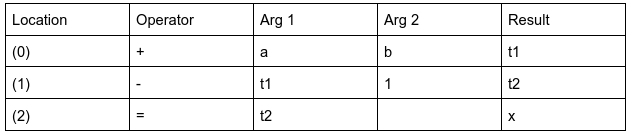

**References**

Ref = https://www.guru99.com/compiler-design-lexical-analysis.html 

##Mini C Subset Compiler


This is a mini compiler for a subset of the C language built as part of our Compiler Design Course Project. It has been built as a series of four incremental phases, each contributing a key part of the compiler.  The compiler developed is upto the intermediate code generation phase.



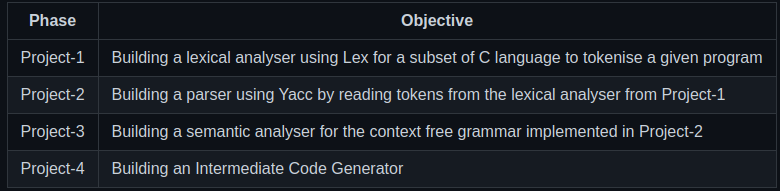


##Lexical Analyser

In [ ]:
%{
	#include "parser.tab.h"
	#include<string.h>
	#include <stdio.h>
	#include<stdlib.h>
	
	/*
		This is the code block where we can write header files and other C functions which we need to implement		
	*/

%}
	/*
		Enclosed betweeen %%..%% are the rules  for matching the tokens which we need .
		A rule is written  in the form of a regular expression  followed by the action which is written in curly braces . 
		In this case it returns constants which find their  value from the "parser.tab.h" header file
		( constants like and IF used in rules) .
		Detailed expressions for regualar expressions can be found in the dragon book (Compiler Principles Tools & Techniques).
	*/

%%
"&"				    { 	return and; 	}
"|"				    { 	return or; 	}
"if"				    {	return IF;	}
"else"				    {	return ELSE;	}
"=="			  	    {	return eq;	}
"!="			  	    {	return ne;	}
"<="			            {	return le;	}
">="			  	    {	return ge;	}
"while"                             {   return WHILE;   }
"return"                            {   return RETURN;  }
"def"                               {   return DEF;     }
"exit"			    	    {	return EXIT;	} 		
"print"			 	    {	return print;	} 
"ptable"			    { 	return ptable;	}
"do"                                {   return DO;      }
"#define"	                    {   return HASHDEF; }
","                                 {   return comma;   }
[0-9]+				    {	

					yylval.no=atoi(yytext) ; 
					return num;
	                            }
[a-z]([a-z]|[0-9])*		    {	
					strcpy(yylval.var,yytext); 
					return id;
				    } 
[ \t\n]					;
[- + ; ( ) * / = < > { } % ? : ]    {  return *yytext;  }
.				    {   printf("invalid char.");  }
%%


int yywrap()
{
return 1;
}


##Parser

In [ ]:
%{
	#include<stdio.h>
	#include<stdlib.h>
	#include<string.h>

	void yyerror(char *s);


	int label_count=0;                 /* Used for the creation of unique labels */
	int parameter_count;	           /* Used to track number of parameters of function read */
	int function_table_count=0;	   /* Holds the size of the function table */
	int function_table_index;	   /* Used for finding the index of a fucntion in table */
	int macro_table_count=0;	   /* Similar to functions for macros */
	int macro_table_index;	           /* Similar to Functions used for macros */		 

	char buffer[300];		   /* Temporary buffer to hold intermediate code  (written to file)*/


	void installid(char s[],int n);    /* Enter symbol and corresponding value to  the symbol table */
	int getid(char s[]);		   /* Get the value associated with  an identifier */
	void dis();			   /* Display the Symbol Table */
	int relop(int a, int b, int c);	   /* Performs relational operation and returns result */

	void installfunction(char str[],int x,int y);	/* Install function in the function table */
	int search_function(char str[]);		/* Search for a function in function table */ 
	void installmacro(char str[],int x);		/* Similar to functions */
	int search_macro(char str[]);			/* Similar to functions */




	 
	char reg[7][10]={"t1","t2","t3","t4","t5","t6"};   /* Temporaries for holding values for IR Code */


	extern FILE *yyout;  		/* Pointer to the output file */
	extern char *yylex();



**The Symbol Table containing name and value**

In [ ]:
struct table
	{
		char name[10];
		int val;
	} symbol[53];





**Function Table for storing info of fucntions like name , return type number of parameters**

In [ ]:
struct function
	{
		char name[30];
		int parameter_count;
		int returns;
	} function_table[53];


**Macro table for holding macros**

In [ ]:
	struct macro_tab
	{
		char name[30];
		int parameter_count;

	} macro_table[53];



%}


In [ ]:
%union{
	int no;
	char var[10];
	char code[100];
      }


**Below are some Bison Specific commands useful for intermediate Code Generation**


In [ ]:
	%token <var> id  
	%token <no> num 
	%type<var> procid 
	%type <code>condn assignment statement while_statement print_statement
	%type <code> function_def params function_call do_while macro macro_def macro_call
	%token print EXIT IF ELSE ptable WHILE DEF comma HASHDEF	RETURN DO
	%type <no>  start exp  term 



	%start start   /* Start Symbol of the Grammar */

	%left and or 
	%left '>' '<' eq ne ge le '?' ':'
	%left '+' '-' '%'
	%left '*' '/'

%%


Below are the rules for the context free grammar which has been used to create the parser
			A Rule of the form A -> BC   is written in bison as
			A : BC  { <ACTION>   }
		
			start is the nonterminal used  to denote start symbol 
			Each nonterminal has a return type which has been mentioned above 
			
			$ is used for accessing values from nonterminals and terminals in the production

In [ ]:


start	: EXIT ';'		{	exit(0);	}
	| print exp ';'		{ 
					printf("Printing: %d\n",$2);
					sprintf(buffer,"%s := %d;"
						       "\nprint %s;\n" ,
						reg[0],$2,reg[0]);
					fprintf(yyout,"%s\n" , buffer);
				}
	| start print exp ';'   { 
					printf("Printing: %d\n",$3); 
					sprintf(buffer,"%s := %d;"
						       "\nprint %s;\n" ,
						reg[0],$3,reg[0]);

					fprintf(yyout,"%s\n" , buffer); 
				}
	|  id '=' exp ';' 	{ 
					 {installid($1,$3);}
					
					 sprintf(buffer,"%s := %d;"
							"\n %s := %s;\n" ,
							reg[0],$3,$1,reg[0]);

					 fprintf(yyout,"%s\n" , buffer); 
				}

	| start  id '=' exp ';' { 
					 {installid($2,$4);} 
					 sprintf(buffer,"%s := %d;"
							"\n %s := %s;\n" ,
							reg[0],$4,$2,reg[0]);

					 fprintf(yyout,"%s\n" , buffer);
				}

	| condn			{ 
					 fprintf(yyout,"%s\n" , $1); 
				}

	| start condn		{ 
					 fprintf(yyout,"%s\n" , $2);
				}
	| while_statement	{ 
					 fprintf(yyout,"%s\n" , $1);
				}

	| start while_statement { 	 
					 fprintf(yyout,"%s\n" , $2);
				}
	| function_def  	{  
					 fprintf(yyout,"%s\n" , $1);
				}
	| start function_def    {
					 fprintf(yyout,"%s\n" , $2);
				}

	| ptable ';' 		{ 		
					 dis();
				}

	| start ptable ';'	{ 
					 dis();
				}

	| start function_call	{
					 fprintf(yyout,"%s\n" , $2);
				}
	| function_call   	{ 
					 fprintf(yyout,"%s\n" , $1);
				}
	| condexp 		{
					;
				}
	| start condexp 	{
					;
				}
	| do_while		{
					 fprintf(yyout,"%s\n" , $1);
				}
	| start do_while	{
					 fprintf(yyout,"%s\n" , $2);
				}
	| macro  		{ 
					 fprintf(yyout,"%s\n" , $1); 

				}
	| start macro 		{ 
					 fprintf(yyout,"%s\n" , $2);
				}
	| macro_def  		{  
					 fprintf(yyout,"%s\n" , $1);
			        }
	| start macro_def 	{
					 fprintf(yyout,"%s\n" , $2);
				}
	| macro_call  		{  
					 fprintf(yyout,"%s\n" , $1);
			        }
	| start macro_call      { 
					 fprintf(yyout,"%s\n" , $2);
				}
	| start EXIT ';'	{

			
					 exit(EXIT_SUCCESS);
		
		
				}
	
        			;

**Do While Loop**

In [ ]:

do_while : DO '{' statement '}' WHILE '(' exp ')' ';' 
	 			{	

					  sprintf(buffer, "\n%d_LABEL:\n%s\n if nz goto %d_LABEL\n",label_count,$3,label_count);
					  label_count+=1;
					  strcpy($$,buffer);
				}

condexp : '(' exp ')' '?' '(' id '=' exp ')' ':' '(' id '=' exp ')' ';'         
				{
       					  if($2>0)
					  {
						installid($6,$8);
					  }
					  else
					  { 
						installid($12,$14);
					  } 
					  fprintf(yyout,"if z %s goto %d_LABEL:;" 
							"\n%s := %d;"
							"\n%s := %s;"
							"\n goto %d_LABEL:"
							"\n %d_LABEL :"
							"\n %s := %d;"
							"\n%s := %s;"
							"\n%d_LABEL:\n" ,
						reg[0],label_count,reg[1],
						$8,$6,reg[1],(label_count+1),label_count,reg[2],
						$14,$12,reg[2],(label_count+1)); ; 

					 label_count+=2; 
				}

        | '(' exp ')' '?' '(' print exp ')' ':' '(' print exp ')' ';'  
				{ 
					 if($2>0)
					 {
						printf("Printing: %d\n",$7);
					 }
					 else
					 {
						printf("Printing: %d\n",$12);
					 }    
					 fprintf(yyout,"if z %s goto %d_LABEL:"
							"\n%s := %d;"
							"\nprint %s;"
							"\ngoto %d_LABEL: "
							"\n%d_LABEL : "
							"\n%s := %d;"
							"\nprint %s;"
							"\n%d_LABEL:\n" ,
						 reg[0],label_count,reg[1],$7,
						 reg[1],(label_count+1),label_count,
						 reg[2],$12,reg[2],(label_count+1));;
					 label_count+=2;
				 }

				;

**Function Definition**

In [ ]:
function_def : DEF procid '(' params ')' '{' statement '}' 
	     			{
	
					 if(search_function($2)!=-1) 
					 { 
						printf("Error Duplicate Function\n");
						exit(0);
					 } 
	  

					sprintf(buffer,"PROCEDURE %s  %s"
						       " \n %s "
						       "\n ENDP",

						       $2,$4,$7);
	  			        strcpy($$,buffer);
					installfunction($2,parameter_count,0);
		
	 		        }
		| DEF procid '(' params ')' '{' statement  RETURN exp ';'  '}' 
				{
	
	 				if(search_function($2)!=-1) 
					{
						 printf("Error Duplicate Function\n");
						 exit(0);
					 } 
	  
					sprintf(buffer,"PROCEDURE %s  %s \n %s \n ENDP",$2,$4,$7);
	 				strcpy($$,buffer);
	  				installfunction($2,parameter_count,1);
	 			 }


## Compiling the Code


In [ ]:
flex lexanalyser.l

bison -d parser.y

gcc -c lex.yy.c parser.tab.c

gcc -o com.out lex.yy.o parser.tab.o



The 3rd command produces a warning which can be ignored .

##Running the Compiler
The above sequence of commands produces an executable com.out which is our compiler . You can feed in the program to be compiled after typing ./com.out
followed by the input program . Type exit ; to escape from the process. The intermediate code will be available in a file named output.txt .

Alternatively you can write a program in a file and put it in the same directory and you canb compile it by using the redirection operator '<' Suppose the filename is program.txt

In [ ]:
./com.out < program.txt

Dont Forget to put exit; at the end of the program to terminate compilations.

Intermediate Code will be available in output.txt

**Sample Program of a Do While Loop**

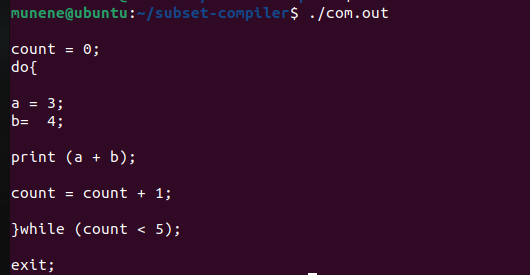

**The Intermediate Code for the Above**

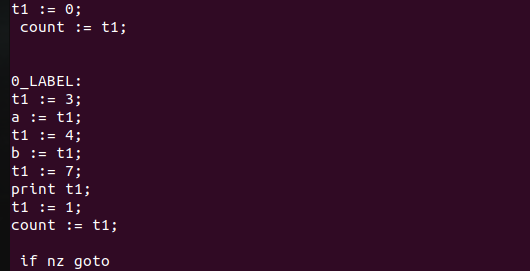